In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=True, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified


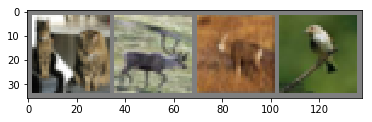

  cat  deer  deer  bird


In [6]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def imshow(img):
    img = img/2 +0.5
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()
dataiter = iter(trainloader)
images, labels = dataiter.next()
imshow(torchvision.utils.make_grid(images))
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [7]:
import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2,2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
    
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net()

In [9]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [10]:
for epoch in range(10):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs,labels = data
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print('%d , %5d | loss: %.3f'%(epoch + 1, i + 1, running_loss/2000))
            running_loss = 0.0
            
print('Finshed Training')

1 ,  2000 | loss: 2.107
1 ,  4000 | loss: 1.959
1 ,  6000 | loss: 1.946
1 ,  8000 | loss: 1.936
1 , 10000 | loss: 1.959
1 , 12000 | loss: 1.922
2 ,  2000 | loss: 1.922
2 ,  4000 | loss: 1.949
2 ,  6000 | loss: 1.935
2 ,  8000 | loss: 1.936
2 , 10000 | loss: 1.938
2 , 12000 | loss: 1.945
3 ,  2000 | loss: 1.921
3 ,  4000 | loss: 1.947
3 ,  6000 | loss: 1.932
3 ,  8000 | loss: 1.960
3 , 10000 | loss: 1.935
3 , 12000 | loss: 1.958
4 ,  2000 | loss: 1.918
4 ,  4000 | loss: 1.971
4 ,  6000 | loss: 1.949
4 ,  8000 | loss: 1.955
4 , 10000 | loss: 1.973
4 , 12000 | loss: 1.944
5 ,  2000 | loss: 1.975
5 ,  4000 | loss: 1.942
5 ,  6000 | loss: 1.956
5 ,  8000 | loss: 1.964
5 , 10000 | loss: 1.944
5 , 12000 | loss: 1.959
6 ,  2000 | loss: 1.970
6 ,  4000 | loss: 1.948
6 ,  6000 | loss: 1.954
6 ,  8000 | loss: 1.935
6 , 10000 | loss: 1.941
6 , 12000 | loss: 1.937
7 ,  2000 | loss: 1.974
7 ,  4000 | loss: 1.951
7 ,  6000 | loss: 1.953
7 ,  8000 | loss: 2.002
7 , 10000 | loss: 1.972
7 , 12000 | loss

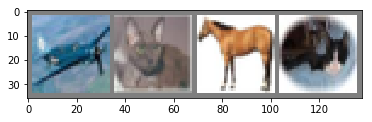

('GroundTruth: ', 'plane   cat horse   cat')


In [11]:
dataiter = iter(testloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [13]:
outputs = net(images)

In [14]:
_, predicted = torch.max(outputs,1)
print('Predicted: ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

('Predicted: ', ' ship  frog horse   dog')


In [15]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        
print('Accuracy of the network on the 10000 test images: %d %%'%(100 * correct/total))
        

Accuracy of the network on the 10000 test images: 26 %
